<a href="https://colab.research.google.com/github/sanasuri101/PredictCarPrices/blob/main/PredictCarPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import iqr
from sklearn.preprocessing import OrdinalEncoder




import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train['train']  = 1
test['train']  = 0
df = pd.concat([train, test], axis=0,sort=False)

In [ ]:
df=df.drop(['model','ext_col','int_col','clean_title'],axis=1,errors='ignore')

In [ ]:
df['model_year']=df['model_year'].astype(int)

In [ ]:
df['fuel_type'].value_counts(normalize=True)

fuel_type
Gasoline          0.911736
Hybrid            0.031817
E85 Flex Fuel     0.027605
Diesel            0.019678
–                 0.005428
Plug-In Hybrid    0.003648
not supported     0.000088
Name: proportion, dtype: float64

In [ ]:
df['fuel_type']=df['fuel_type'].apply(lambda x:
                                      np.nan if str(x).strip()=='–' else
                                      'electric' if str(x).strip()=='not supported' else x)

In [ ]:
hp=df['engine'].apply(lambda x:x.split('HP')[0]).apply(pd.to_numeric,errors='coerce')
liters=df['engine'].apply(lambda x:x.split('L')[0].split('Liter')[0].split(' ')[-1]).apply(pd.to_numeric,errors='coerce')

df['HP']=hp
df['Engine Volume (L)']=liters

df=df.drop(columns='engine')

In [ ]:
df['model_year' ]=2024-df['model_year']

In [ ]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['fuel_type'])
df['fuel_type_target'] = encoder.fit_transform(df['fuel_type'], df['price'])
df.head()

,id,brand,model_year,milage,fuel_type,transmission,accident,price,train,HP,Engine Volume (L),fuel_type_target
0,0,Ford,6,74349,Gasoline,10-Speed A/T,None reported,11000.0,1,375.0,3.5,38940.499747
1,1,BMW,17,80000,Gasoline,6-Speed M/T,None reported,8250.0,1,300.0,3.0,38940.499747
2,2,Jaguar,15,91491,Gasoline,6-Speed A/T,None reported,15000.0,1,300.0,4.2,38940.499747
3,3,BMW,2,2437,Hybrid,Transmission w/Dual Shift Mode,None reported,63500.0,1,335.0,3.0,51727.819366
4,4,Pontiac,23,111000,Gasoline,A/T,None reported,7850.0,1,200.0,3.8,38940.499747


In [ ]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['transmission'])
df['transmission_target'] = encoder.fit_transform(df['transmission'], df['price'])
df.head()

,id,brand,model_year,milage,fuel_type,transmission,accident,price,train,HP,Engine Volume (L),fuel_type_target,transmission_target
0,0,Ford,6,74349,Gasoline,10-Speed A/T,None reported,11000.0,1,375.0,3.5,38940.499747,60508.125743
1,1,BMW,17,80000,Gasoline,6-Speed M/T,None reported,8250.0,1,300.0,3.0,38940.499747,33931.317579
2,2,Jaguar,15,91491,Gasoline,6-Speed A/T,None reported,15000.0,1,300.0,4.2,38940.499747,24939.541386
3,3,BMW,2,2437,Hybrid,Transmission w/Dual Shift Mode,None reported,63500.0,1,335.0,3.0,51727.819366,45993.777037
4,4,Pontiac,23,111000,Gasoline,A/T,None reported,7850.0,1,200.0,3.8,38940.499747,29971.027033


In [ ]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['brand'])
df['brand_target'] = encoder.fit_transform(df['brand'], df['price'])
df.head()

,id,brand,model_year,milage,fuel_type,transmission,accident,price,train,HP,Engine Volume (L),fuel_type_target,transmission_target,brand_target
0,0,Ford,6,74349,Gasoline,10-Speed A/T,None reported,11000.0,1,375.0,3.5,38940.499747,60508.125743,38154.063227
1,1,BMW,17,80000,Gasoline,6-Speed M/T,None reported,8250.0,1,300.0,3.0,38940.499747,33931.317579,40276.029448
2,2,Jaguar,15,91491,Gasoline,6-Speed A/T,None reported,15000.0,1,300.0,4.2,38940.499747,24939.541386,34840.403933
3,3,BMW,2,2437,Hybrid,Transmission w/Dual Shift Mode,None reported,63500.0,1,335.0,3.0,51727.819366,45993.777037,40276.029448
4,4,Pontiac,23,111000,Gasoline,A/T,None reported,7850.0,1,200.0,3.8,38940.499747,29971.027033,17526.114591


In [ ]:
df['accident'] = df['accident'].replace('At least 1 accident or damage reported',1)
df.loc[df['accident'] != 1, 'accident'] = 0

In [ ]:
df['accident'] = df['accident'].astype(int)

In [ ]:
median_hp = df['HP'].median()
median_engine_volume = df['Engine Volume (L)'].median()

In [ ]:
df['HP'] = df['HP'].fillna(median_hp)
df['Engine Volume (L)'] = df['Engine Volume (L)'].fillna(median_engine_volume)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90456 entries, 0 to 36182
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   90456 non-null  int64  
 1   brand                90456 non-null  object 
 2   model_year           90456 non-null  int64  
 3   milage               90456 non-null  int64  
 4   fuel_type            89965 non-null  object 
 5   transmission         90456 non-null  object 
 6   accident             90456 non-null  int64  
 7   price                54273 non-null  float64
 8   train                90456 non-null  int64  
 9   HP                   90456 non-null  float64
 10  Engine Volume (L)    90456 non-null  float64
 11  fuel_type_target     90456 non-null  float64
 12  transmission_target  90454 non-null  float64
 13  brand_target         90452 non-null  float64
dtypes: float64(6), int64(5), object(3)
memory usage: 12.4+ MB


In [ ]:
df.head(5)

,id,brand,model_year,milage,fuel_type,transmission,accident,price,train,HP,Engine Volume (L),fuel_type_target,transmission_target,brand_target
0,0,Ford,6,74349,Gasoline,10-Speed A/T,0,11000.0,1,375.0,3.5,38940.499747,60508.125743,38154.063227
1,1,BMW,17,80000,Gasoline,6-Speed M/T,0,8250.0,1,300.0,3.0,38940.499747,33931.317579,40276.029448
2,2,Jaguar,15,91491,Gasoline,6-Speed A/T,0,15000.0,1,300.0,4.2,38940.499747,24939.541386,34840.403933
3,3,BMW,2,2437,Hybrid,Transmission w/Dual Shift Mode,0,63500.0,1,335.0,3.0,51727.819366,45993.777037,40276.029448
4,4,Pontiac,23,111000,Gasoline,A/T,0,7850.0,1,200.0,3.8,38940.499747,29971.027033,17526.114591


In [ ]:
# prompt: print numerical and categorical columns

#numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
#categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

#print("Numerical columns:", numerical_columns)
#print("Categorical columns:", categorical_columns)


Numerical columns: ['id', 'model_year', 'milage', 'price', 'train']
Categorical columns: ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']


In [ ]:
#categorical_df = df.select_dtypes(include=['object'])
#numerical_df =df.select_dtypes(exclude=['object'])

In [ ]:
#ordinal_encoder = OrdinalEncoder()

#categorical_df[categorical_columns] = ordinal_encoder.fit_transform(categorical_df[categorical_columns])
#checking the output_encoded = X
#categorical_df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,14.0,649.0,2.0,730.0,2.0,28.0,63.0,1.0,0.0
1,4.0,49.0,2.0,544.0,19.0,19.0,12.0,1.0,0.0
2,21.0,1803.0,2.0,551.0,15.0,194.0,9.0,1.0,0.0
3,4.0,1779.0,3.0,657.0,45.0,107.0,28.0,1.0,0.0
4,40.0,699.0,2.0,224.0,35.0,263.0,12.0,1.0,0.0


In [ ]:
#df_final = pd.concat([numerical_df, categorical_df], axis=1,sort=False)


In [ ]:
#df_final['model_year'] = 2024 - df_final['model_year']


In [ ]:
#df_final.head()

,id,model_year,milage,price,train,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,0,6,74349,11000.0,1,14.0,649.0,2.0,730.0,2.0,28.0,63.0,1.0,0.0
1,1,17,80000,8250.0,1,4.0,49.0,2.0,544.0,19.0,19.0,12.0,1.0,0.0
2,2,15,91491,15000.0,1,21.0,1803.0,2.0,551.0,15.0,194.0,9.0,1.0,0.0
3,3,2,2437,63500.0,1,4.0,1779.0,3.0,657.0,45.0,107.0,28.0,1.0,0.0
4,4,23,111000,7850.0,1,40.0,699.0,2.0,224.0,35.0,263.0,12.0,1.0,0.0


In [ ]:
df_final = df.drop(['id','brand','fuel_type','transmission'],axis=1)



In [ ]:
df_final.head(5)

,model_year,milage,accident,price,train,HP,Engine Volume (L),fuel_type_target,transmission_target,brand_target
0,6,74349,0,11000.0,1,375.0,3.5,38940.499747,60508.125743,38154.063227
1,17,80000,0,8250.0,1,300.0,3.0,38940.499747,33931.317579,40276.029448
2,15,91491,0,15000.0,1,300.0,4.2,38940.499747,24939.541386,34840.403933
3,2,2437,0,63500.0,1,335.0,3.0,51727.819366,45993.777037,40276.029448
4,23,111000,0,7850.0,1,200.0,3.8,38940.499747,29971.027033,17526.114591


In [ ]:
#only train data
df_train = df_final[df_final['train'] == 1]
df_train = df_train.drop(['train',],axis=1)



#only test data
df_test = df_final[df_final['train'] == 0]
df_test = df_test.drop(['price'],axis=1)
df_test = df_test.drop(['train',],axis=1)


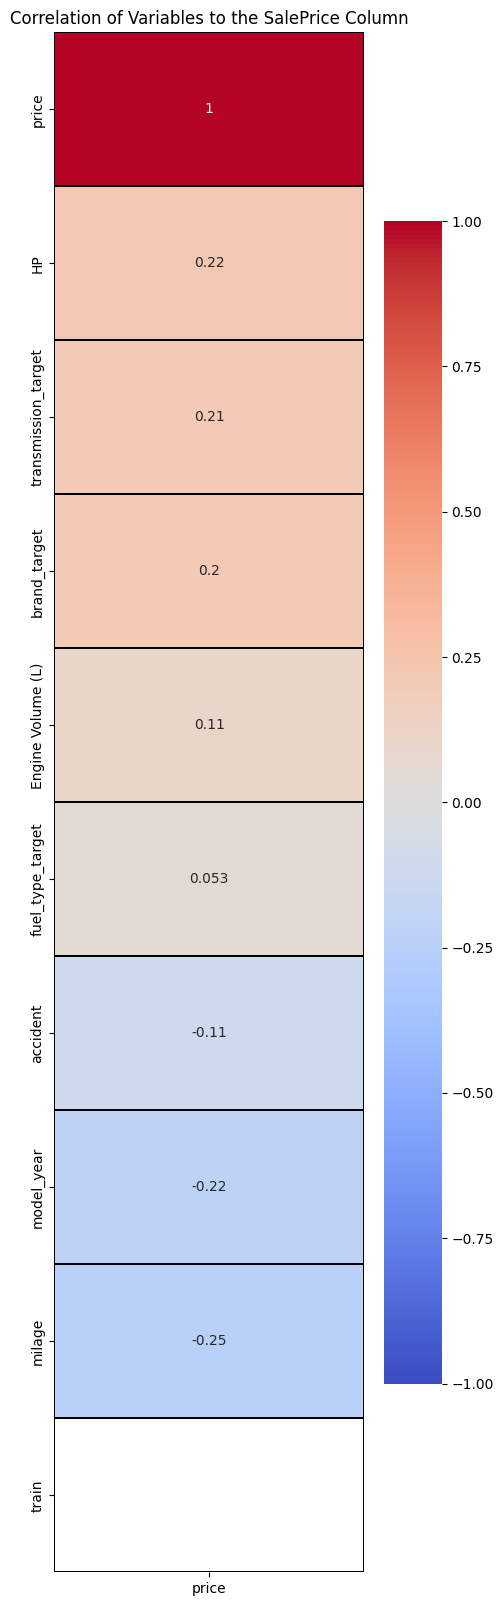

In [ ]:
plt.figure(figsize=(5,20))
sns.heatmap(df_final.corr()['price'].sort_values(ascending=False).to_frame(), cmap='coolwarm',
 annot=True, vmin=-1, vmax=1, linewidths=0.3, linecolor='black')
plt.title('Correlation of Variables to the SalePrice Column')
plt.show()

In [ ]:
X = df_train.drop('price', axis=1)
y = df_train['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [ ]:
xg_reg_simple = xgb.XGBRegressor(objective="reg:squarederror", seed=123)

#fit the regressor to the training set
xg_reg_simple.fit(X_train, y_train)

#predict the labels of the test set
preds_simple = xg_reg_simple.predict(X_test)
# from catboost import CatBoostRegressor

# cat_reg_simple = CatBoostRegressor(objective="RMSE", random_seed=123)

# # Fit the regressor to the training set
# cat_reg_simple.fit(X_train, y_train, verbose=False)

# # Predict the labels of the test set
# preds_simple = cat_reg_simple.predict(X_test)
#compute the rmse
rmse_simple = np.sqrt(mean_squared_error(y_test, preds_simple))
print("RMSE: %f" % (rmse_simple))

RMSE: 83604.460319


In [ ]:
param_dist = {
    'n_estimators': [100, 250, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3,4,5,6,7],
    'subsample': [0.6, 0.8, 1.0],

}

#instantiate the XGBRegressor
xg_reg = xgb.XGBRegressor(objective="reg:squarederror", seed=123)

#instantiate the random search and fit it
random_search = RandomizedSearchCV(
    estimator=xg_reg,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=123,
    n_jobs=-1
)

#fit the random search to the data
random_search.fit(X_train, y_train)

#print the best parameters
print("Best parameters found: ", random_search.best_params_)

#predict the labels of the test set using the best estimator
best_xg_reg = random_search.best_estimator_
xg_preds = best_xg_reg.predict(X_test)

#compute the RMSE
rmse = np.sqrt(mean_squared_error(y_test, xg_preds))
print("RMSE: %f" % (rmse))
print("RMSE improvement: %f" % (rmse_simple - rmse))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01}
RMSE: 79354.519591
RMSE improvement: 161.401194


In [ ]:
!pip install lightgbm
import lightgbm as lgb

params = {

    'learning_rate': [0.05],
    'n_estimators': [500],
    'max_depth': [10],
    'num_leaves': [6],
    'min_data_in_leaf': [5],
    'bagging_fraction': [0.75],
    'bagging_freq': [3],
    'feature_fraction': [0.25],
    'subsample':[0.80]

}

model = lgb.LGBMRegressor(objective='regression',
                          learning_rate=0.05,
                          n_estimators =525,
                          max_depth=5,
                          num_leaves=5,
                          min_data_in_leaf=5,
                          bagging_fraction=0.75,
                          bagging_freq=1,
                          feature_fraction=0.25,
                          subsample=0.8,
                          random_state=123,
                          n_jobs=-1,

                          )

model.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.8 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.8 will be ignored. Current val

LGBMRegressor(bagging_fraction=0.75, bagging_freq=1, feature_fraction=0.25,
              learning_rate=0.05, max_depth=5, min_data_in_leaf=5,
              n_estimators=525, n_jobs=-1, num_leaves=5, objective='regression',
              random_state=123, subsample=0.8)

In [ ]:
lgb_pred = model.predict(X_test)
rmse_simple = np.sqrt(mean_squared_error(y_test, lgb_pred))
print("RMSE: %f" % (rmse_simple))

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.8 will be ignored. Current value: bagging_fraction=0.75
RMSE: 79515.920785


In [ ]:
lr = LinearRegression()
ridge = Ridge()
svr = SVR()
rf = RandomForestRegressor()

# Define meta model
meta_model = XGBRegressor()

# Initialize StackingCVRegressor
from mlxtend.regressor import StackingCVRegressor
stack_reg = StackingCVRegressor(regressors=(model, best_xg_reg),
                                meta_regressor=meta_model,
                                use_features_in_secondary=True)

# Fit the stack regressor (no need to re-train base models)
stack_reg.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.8 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.8 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Info] Auto-choosing row-wise multi-threadi

StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate...
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=0.01, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None, max_depth=3,
                                             max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=500, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=None, ...)),
                    use_features_in_secondary=True)

In [ ]:
predict_test  = stack_reg.predict(X_test)
print("RMSE: %f" % (np.sqrt(mean_squared_error(y_test, predict_test))))

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.8 will be ignored. Current value: bagging_fraction=0.75
RMSE: 82267.145286


In [ ]:
predict_test= best_xg_reg.predict(df_test)

In [ ]:
submission = pd.DataFrame({
        "id": test["id"],
        "price": predict_test
    })
submission.to_csv('submission.csv', index=False)